In [1]:
from google.colab import files
uploaded = files.upload()

Saving Financials (2).csv to Financials (2).csv


In [1]:
import pandas as pd
import sqlite3

#reading the csv file
finance_data = pd.read_csv('/content/Financials (2).csv')

#view the csv data file
finance_data.head()

#structuring the coloumn headers
finance_data.columns = finance_data.columns.str.replace(' ', '_')
finance_data.columns = finance_data.columns.str.lower()

#need to fill null values
finance_data.fillna(0, inplace=True)

#view data after cleaning
finance_data.head()

,segment,country,_product_,_discount_band_,_units_sold_,_manufacturing_price_,_sale_price_,_gross_sales_,_discounts_,__sales_,_cogs_,_profit_,date,month_number,_month_name_,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [2]:
import pandas as pd
import sqlite3

#creating the database to store the data
conn = sqlite3.connect('finance_data.db')
finance_data.to_sql('finance_data', conn, if_exists='replace', index=False)

#create the cursor to creat table inside the database
cursor = conn.cursor()

#create the table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    date TEXT ,
    segment TEXT,
    profit INTEGER,
    sales INTEGER,
    unit_sold INTEGER,
    manufaturing_price INTEGER,
    year INTEGER,
    sales_price INTEGER,
    month TEXT,
    product TEXT
    country TEXT
)
''')

#once table and database created print the status
print("Database created successfully")

Database created successfully


In [7]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


            segment  total_profit
0  Channel Partners       1271.00
1        Enterprise        144.00
2        Government      16605.65
3         Midmarket       3268.65
4    Small Business       3305.00
            segment  total_sales
0  Channel Partners         1755
1        Enterprise         2069
2        Government         4695
3         Midmarket         2331
4    Small Business          891
   year           segment  total_profit
0  2013  Channel Partners        279.00
1  2013        Enterprise         25.00
2  2013        Government       2004.94
3  2013         Midmarket        139.00
4  2013    Small Business        617.00
5  2014  Channel Partners        992.00
6  2014        Enterprise        119.00
7  2014        Government      14600.71
8  2014         Midmarket       3129.65
9  2014    Small Business       2688.00
     _product_  total_profit
0    Amarilla        1304.00
1   Carretera        3480.41
2     Montana        3813.10
3       Paseo        7669.25
4         VTT

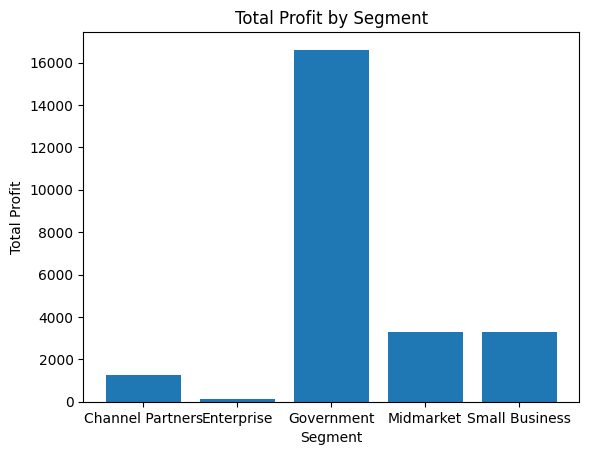

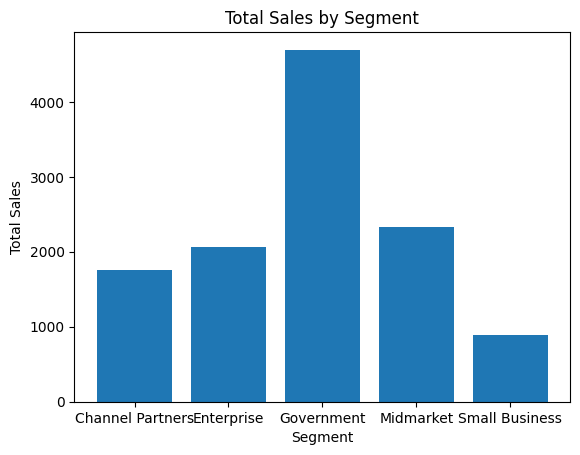

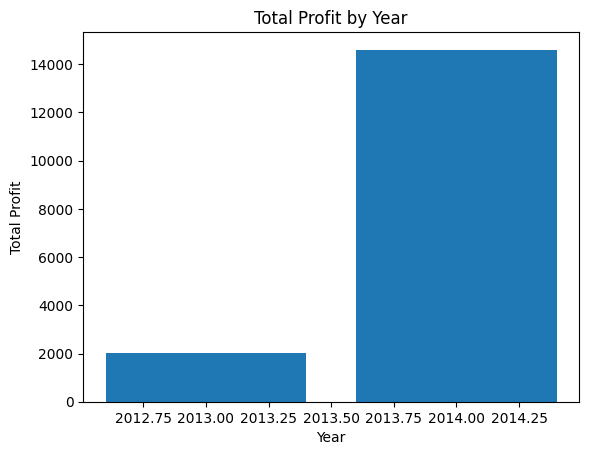

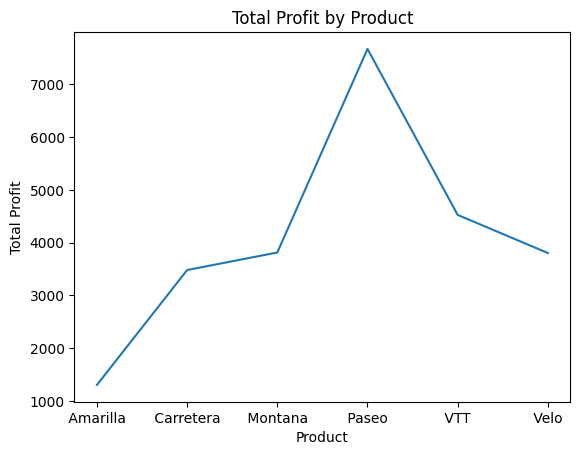

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import streamlit as st
#connecting to the finance database
conn = sqlite3.connect('finance_data.db')

#Calculating the segment wise profit
segment_profit = pd.read_sql_query('''
SELECT segment, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data
GROUP BY segment
''', conn)
print(segment_profit)

#Calculating the segment wise sales
sales = pd.read_sql_query('''
SELECT segment, SUM(CAST(REPLACE(__sales_, '$', '') AS DECIMAL(10,2))) AS total_sales
FROM finance_data
GROUP BY segment
''', conn)
print(sales)

#calculating yearly wise profit on each segment
yearly_profit = pd.read_sql_query('''
SELECT year, segment, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data
GROUP BY year, segment
''', conn)
print(yearly_profit)

#calculating the profit happens product wise
product_profit = pd.read_sql_query('''
SELECT _product_, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data
GROUP BY _product_
''', conn)
print(product_profit)

#calculating which product gave less profit
less_profit = pd.read_sql_query('''
SELECT segment, _product_, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data ORDER BY total_profit ASC
LIMIT 2
''', conn)
print(less_profit)

#visualisation for total profit
plt.bar(segment_profit['segment'], segment_profit['total_profit'])
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')
plt.show()

#visualisation for total sales
plt.bar(sales['segment'], sales['total_sales'])
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')
plt.show()

#visualisation for yearly profit
plt.bar(yearly_profit['year'], yearly_profit['total_profit'])
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')
plt.show()

#visualisation for product profit
plt.plot(product_profit['_product_'], product_profit['total_profit'])
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product')
plt.show()



In [14]:
%%writefile finance_app.py
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import streamlit as st

# Assuming 'finance_data.db' is already created and populated from the previous code

# Connecting to the database
conn = sqlite3.connect('finance_data.db')

# Streamlit app
st.title("Financial Data Dashboard")

# Sidebar for navigation/filters
st.sidebar.header("Filters")
selected_year = st.sidebar.selectbox("Select Year", pd.read_sql_query("SELECT DISTINCT year FROM finance_data", conn)['year'].unique())

# Queries with filtering
segment_profit = pd.read_sql_query(f"""
SELECT segment, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data
WHERE year = {selected_year}
GROUP BY segment
""", conn)

sales = pd.read_sql_query(f"""
SELECT segment, SUM(CAST(REPLACE(_sales_, '$', '') AS DECIMAL(10,2))) AS total_sales
FROM finance_data
WHERE year = {selected_year}
GROUP BY segment
""", conn)


# Displaying data and charts
st.subheader("Segment-wise Profit")
st.bar_chart(segment_profit.set_index('segment'))

st.subheader("Segment-wise Sales")
st.bar_chart(sales.set_index('segment'))

# ... (rest of your Streamlit code to display other charts and data)

# Example for yearly profit (replace with your actual data)
yearly_profit = pd.read_sql_query(f"""
SELECT year, SUM(CAST(REPLACE(_profit_, '$', '') AS DECIMAL(10,2))) AS total_profit
FROM finance_data
GROUP BY year
""", conn)
st.subheader("Yearly Profit")
st.line_chart(yearly_profit.set_index('year'))

# Close the connection
conn.close()lose()


Writing finance_app.py
